In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score
import matplotlib.pyplot as plt
from sklearn import tree
from google.colab import drive

In [6]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
cd drive/My\ Drive

/content/drive/My Drive


In [8]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [9]:
from google.colab import files
uploaded = files.upload()

Saving titanicdf.csv to titanicdf (1).csv


In [10]:
titanic_df = pd.read_csv('titanicdf.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_df.Survived.value_counts(normalize=True) # % выживших, делать по всем полям

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [13]:
titanic_df.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [14]:
titanic_df.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [15]:
titanic_df.Age.value_counts(normalize=True)

24.00    0.042017
22.00    0.037815
18.00    0.036415
19.00    0.035014
30.00    0.035014
           ...   
55.50    0.001401
70.50    0.001401
66.00    0.001401
23.50    0.001401
0.42     0.001401
Name: Age, Length: 88, dtype: float64

In [16]:
titanic_df.Parch.value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

In [17]:
titanic_df.Parch.value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

In [18]:
titanic_df.Fare.value_counts(normalize=True)

8.0500     0.048260
13.0000    0.047138
7.8958     0.042649
7.7500     0.038159
26.0000    0.034792
             ...   
8.4583     0.001122
9.8375     0.001122
8.3625     0.001122
14.1083    0.001122
17.4000    0.001122
Name: Fare, Length: 248, dtype: float64

In [19]:
titanic_df.Cabin.value_counts(normalize=True)

C23 C25 C27    0.019608
G6             0.019608
B96 B98        0.019608
E101           0.014706
C22 C26        0.014706
                 ...   
A26            0.004902
A32            0.004902
E12            0.004902
B19            0.004902
C148           0.004902
Name: Cabin, Length: 147, dtype: float64

In [20]:
titanic_df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [53]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


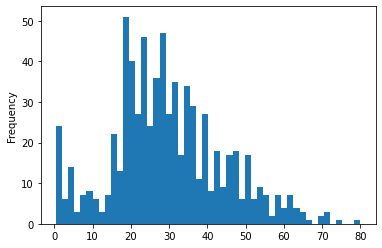

In [21]:
titanic_df.Age.plot(kind='hist',bins=50) # разбить на группы

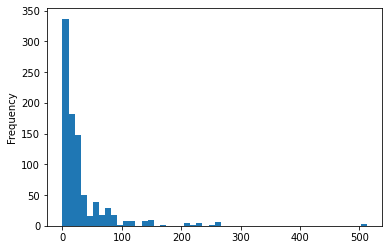

In [22]:
titanic_df.Fare.plot(kind='hist',bins=50)

In [23]:
for col in titanic_df.columns:
  print(col, round(titanic_df[col].isna().sum() / titanic_df.shape[0] *100,2)) # проверить на пропуски, проверяет каждую колонку, округляет до 2, если много пропусков, надоо убрать колонку, если мало, можно заменить

PassengerId 0.0
Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 19.87
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 77.1
Embarked 0.22


In [25]:
tit_df = pd.get_dummies(data=titanic_df, columns=['Pclass', 'Sex', 'Embarked']) # переводит поля в числа, добавляет колонки, кол-во колонок = уникальные значения класса так можно проверить, категориальные ли данные, NAN тоже обрабатывает

In [26]:
tit_df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,1,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,0,1,1,0,0


In [27]:
df = tit_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
888,889,0,NaN,1,2,23.4500,0,0,1,1,0,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


In [28]:
df.duplicated().sum() # проверить на дубликаты 

0

In [29]:
df.drop_duplicates(inplace=True) # убрать дубликаты

In [30]:
df.dropna(inplace=True) # убрать пропуски, не всегда хорошо
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,39.0,0,5,29.1250,0,0,1,1,0,0,1,0
886,887,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


In [31]:
X = df.drop('Survived', axis = 1)

In [32]:
Y = df['Survived']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.33, random_state=42)

In [34]:
import numpy as np  # масштабирование данных
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [37]:
model = clf.fit(X_train, y_train)
pred = model.predict(X_test)

In [38]:
print('Accuracy:',accuracy_score(y_test,pred))
print('Precision:',precision_score(y_test,pred))
print('Recall:',recall_score(y_test,pred))
print('F1:',f1_score(y_test,pred))


Accuracy: 0.8135593220338984
Precision: 0.8235294117647058
Recall: 0.7070707070707071
F1: 0.7608695652173914


In [39]:
model.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [40]:
model.predict_proba(X_test)[:,1]

array([0.22, 0.93, 0.68, 0.99, 0.06, 0.52, 0.28, 0.74, 0.61, 0.54, 0.98,
       0.96, 0.36, 0.21, 1.  , 0.19, 0.24, 0.98, 0.09, 1.  , 0.42, 0.79,
       0.84, 0.35, 0.11, 0.32, 0.54, 0.12, 0.68, 0.12, 0.25, 0.56, 0.84,
       0.01, 0.11, 0.16, 0.11, 0.36, 0.04, 0.2 , 0.36, 0.07, 0.98, 0.12,
       0.29, 0.89, 0.94, 0.35, 0.27, 0.88, 0.28, 0.97, 0.32, 0.19, 0.02,
       0.92, 0.38, 0.16, 0.01, 0.04, 0.79, 0.21, 0.74, 0.2 , 0.01, 0.47,
       0.62, 0.98, 0.11, 0.27, 0.09, 0.95, 0.18, 0.31, 0.28, 0.08, 0.01,
       0.01, 0.28, 0.51, 0.26, 0.45, 0.23, 0.02, 0.01, 0.29, 0.26, 0.22,
       0.01, 0.16, 0.27, 1.  , 0.93, 0.05, 0.85, 0.56, 0.98, 0.65, 0.08,
       0.33, 0.98, 0.97, 0.14, 0.39, 0.96, 0.13, 0.  , 0.39, 0.6 , 0.91,
       0.7 , 0.11, 0.03, 0.28, 0.08, 0.4 , 0.19, 0.6 , 0.26, 0.  , 0.97,
       0.03, 0.11, 0.13, 0.93, 0.03, 0.22, 0.94, 0.21, 0.66, 0.09, 0.16,
       0.27, 0.98, 0.31, 0.04, 0.06, 0.4 , 0.14, 0.24, 0.16, 0.79, 0.86,
       0.35, 0.32, 0.19, 0.01, 0.15, 0.25, 0.15, 0.

In [41]:
pred_proba = model.predict_proba(X_test)[:,1]

In [42]:
fpr, tpr, treshold = roc_curve(y_test, pred_proba)
tree_auc = roc_auc_score(y_test, pred_proba)
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tree_auc))

DecisionTreeClassifier: ROC AUC=0.864


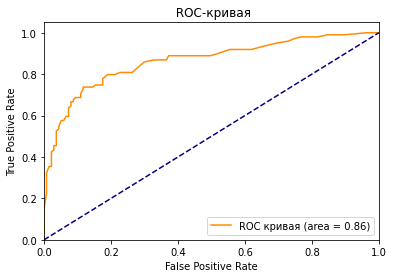

In [51]:
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr,  color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [44]:
test_deep = []
for deep in range (1,31):
  for leaf in range (1,5):
    # print("--------", deep, "--------", leaf)
    clf = tree.DecisionTreeClassifier(max_depth=deep, min_samples_leaf=leaf)
    model = clf.fit(X_train, y_train)
    pred = model.predict(X_test)
    test_deep.append([deep,leaf,f1_score(y_test,pred),recall_score(y_test,pred)])

In [45]:
test_deep = pd.DataFrame(test_deep)
test_deep.columns = ['tree_depth','leaf','f1_score','recall_score']
# test_deep.sort_values(by='f1_score',ascending=False).head()

In [46]:
test_deep.sort_values(by='f1_score',ascending=False).head(10)

,tree_depth,leaf,f1_score,recall_score
13,4,2,0.736842,0.707071
12,4,1,0.736842,0.707071
15,4,4,0.730159,0.696970
14,4,3,0.726316,0.696970
79,20,4,0.718232,0.656566
87,22,4,0.718232,0.656566
59,15,4,0.711111,0.646465
71,18,4,0.711111,0.646465
95,24,4,0.711111,0.646465
31,8,4,0.711111,0.646465


In [48]:
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')

In [49]:
scores.mean()

0.7203850531453081

In [50]:
scores

array([0.73015873, 0.84482759, 0.66666667, 0.70175439, 0.61428571,
       0.81818182, 0.64814815, 0.74285714, 0.59322034, 0.84375   ])